In [167]:
# Importing libraries
import pandas as pd, numpy as np,matplotlib.pyplot as plt,seaborn as sns
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns', 130)
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format',None)

In [168]:
# Importing datasets
df_init = pd.read_csv("Leads.csv")
df_init.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [169]:
# Let's check the dimensions of the dataframe
df_init.shape

(9240, 37)

In [170]:
# let's look at the statistical aspects of the dataframe
df_init.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Analysis Of Numerical Columns

In [171]:
#dropping Lead Number as it is ID field
df_init.drop(['Lead Number'],axis=1,inplace=True)

In [172]:
NUM=['Converted',
'TotalVisits',
'Total Time Spent on Website',
'Page Views Per Visit',
'Asymmetrique Activity Score',
'Asymmetrique Profile Score']

In [173]:
df_init[NUM].isnull().mean().sort_values(ascending=False)*100

Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
TotalVisits                     1.482684
Page Views Per Visit            1.482684
Converted                       0.000000
Total Time Spent on Website     0.000000
dtype: float64

In [174]:
#Dropping columns which have more than 40% missing values
df_init.drop(['Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1,inplace=True)

Missing Value and Outlier Treatment Of Numerical Variables

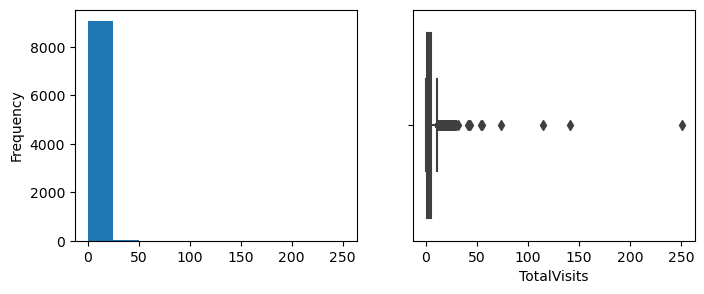

In [175]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
df_init['TotalVisits'].plot.hist()
plt.subplot(1,2,2)
sns.boxplot(df_init['TotalVisits'])
plt.show()

In [176]:
#Replacing Missing with median as data has outliers
df_init.TotalVisits =df_init.TotalVisits.fillna(df_init.TotalVisits.median())

In [177]:
df_init.TotalVisits.quantile([.50,.75,.80,.85,.90,.95,.97,.99,1])


0.50      3.0
0.75      5.0
0.80      5.0
0.85      6.0
0.90      7.0
0.95     10.0
0.97     11.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [178]:
#Outlier Treatement--replacing outliers with 95% value
df_init.TotalVisits=np.where(df_init.TotalVisits>10,10,df_init.TotalVisits)

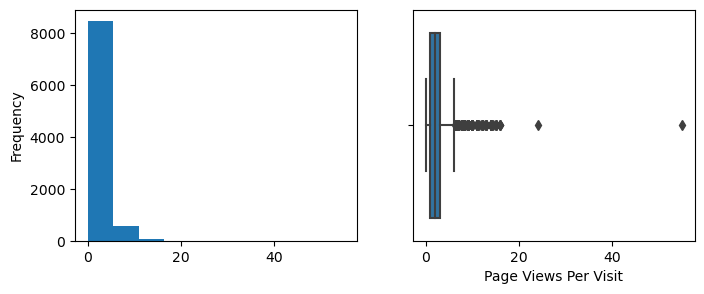

In [179]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
df_init['Page Views Per Visit'].plot.hist()
plt.subplot(1,2,2)
sns.boxplot(df_init['Page Views Per Visit'])
plt.show()

In [180]:
#Replacing Missing with median as data has outliers
df_init['Page Views Per Visit'] =df_init['Page Views Per Visit'].fillna(df_init['Page Views Per Visit'].median())

In [181]:
df_init['Page Views Per Visit'].quantile([.25,.50,.75,.80,.85,.90,.95,.97,.99,1])

0.25     1.0
0.50     2.0
0.75     3.0
0.80     4.0
0.85     4.0
0.90     5.0
0.95     6.0
0.97     7.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

In [182]:
#Outlier Treatement--replacing outliers with 95% value
df_init['Page Views Per Visit']=np.where(df_init['Page Views Per Visit']>6,6,df_init['Page Views Per Visit'])

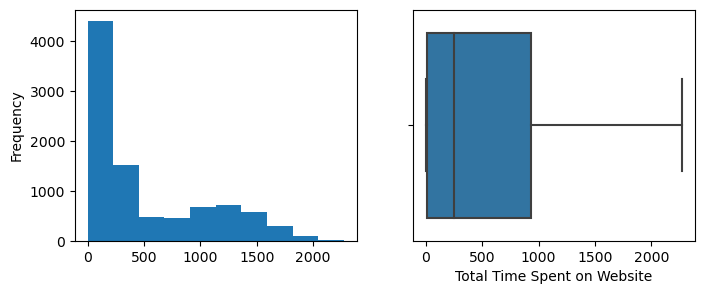

In [183]:
#no outliers in this column
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
df_init['Total Time Spent on Website'].plot.hist()
plt.subplot(1,2,2)
sns.boxplot(df_init['Total Time Spent on Website'])
plt.show()

BIVARIATE ANALYSIS

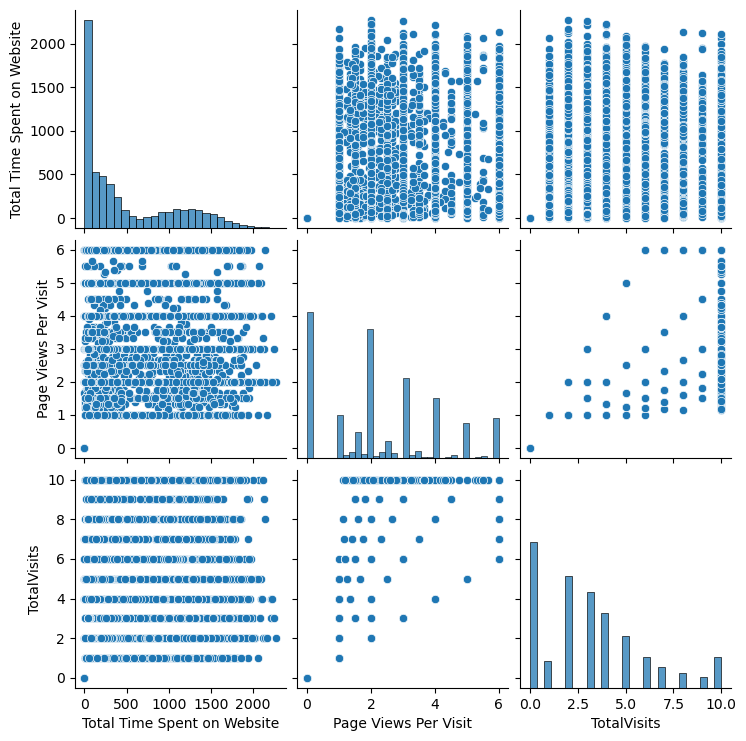

In [184]:
sns.pairplot(data=df_init,vars=['Total Time Spent on Website','Page Views Per Visit','TotalVisits'])

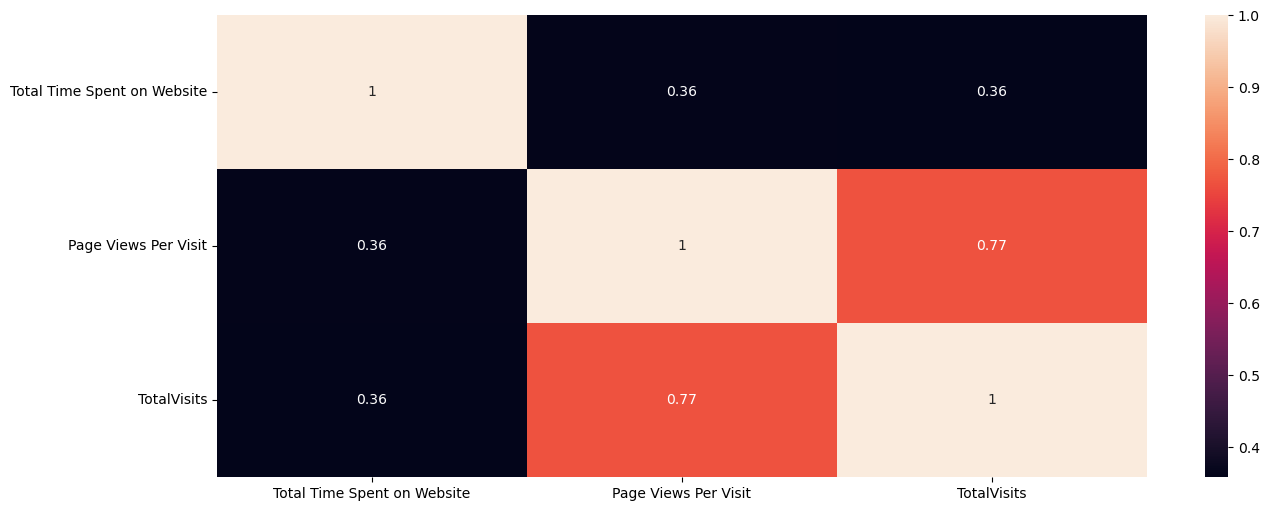

In [185]:
#High corelation b/w pages views per visit and TOtal Visits
plt.figure(figsize=(15,6))
sns.heatmap(df_init[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']].corr(),annot=True)
plt.show()

In [186]:
df_init.groupby("Converted")['Total Time Spent on Website'].mean()

Converted
0    330.404473
1    738.546757
Name: Total Time Spent on Website, dtype: float64

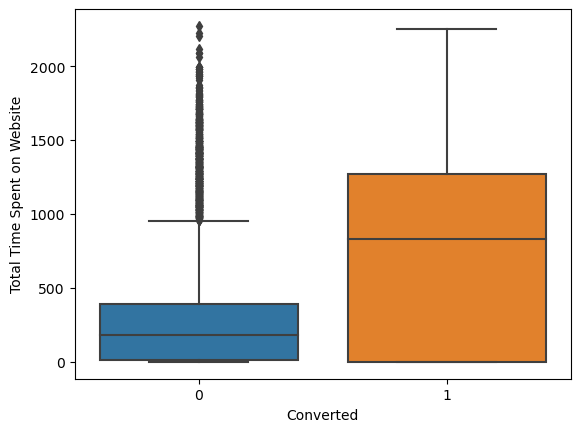

In [187]:
sns.boxplot(data=df_init,x="Converted",y="Total Time Spent on Website")
plt.show()
#conversion rate is high for people spending more time

# Character Variable Analysis

In [188]:
cat=['Lead Source','Lead Origin',
'Do Not Email',
'Do Not Call',
'Last Activity',
'Country',
'Specialization',
'How did you hear about X Education',
'What is your current occupation',
'What matters most to you in choosing a course',
'Search',
'Magazine',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations',
'Receive More Updates About Our Courses',
'Tags',
'Lead Quality',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'Lead Profile',
'City',
'Asymmetrique Activity Index',
'Asymmetrique Profile Index',
'I agree to pay the amount through cheque',
'A free copy of Mastering The Interview',
'Last Notable Activity']

In [189]:
for i in cat:
    print(i,end="---")
    print('Missing',end=":")
    print(df_init[i].isnull().mean()*100)
    print(round(df_init[i].value_counts(normalize=True)*100,2))
    print()
    

Lead Source---Missing:0.38961038961038963
Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

Lead Origin---Missing:0.0
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

Do Not Email---Missing:0.0
No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

Do Not Call---Missing:0.0
No     99.98
Ye

In [190]:
#Deleting Columns which have more than 99.95 % values in one category and ID columns
df_init.drop(['Prospect ID','Do Not Call','What matters most to you in choosing a course','Newspaper',
'Search',
'Magazine',
'Newspaper Article',
'X Education Forums',
'X Education Forums',
'Digital Advertisement',
'Through Recommendations',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque'], axis=1,inplace=True)

In [191]:
cat=['Lead Origin',
     'Lead Source','Do Not Email',
'Last Activity',
'Country',
'Specialization',
'How did you hear about X Education',
'What is your current occupation',
'Tags',
'Lead Quality',
'Lead Profile',
'City',
'Asymmetrique Activity Index',
'Asymmetrique Profile Index',
'A free copy of Mastering The Interview',
'Last Notable Activity']

In [192]:
df_init[cat].isnull().mean().sort_values(ascending=False)*100

Lead Quality                              51.590909
Asymmetrique Activity Index               45.649351
Asymmetrique Profile Index                45.649351
Tags                                      36.287879
Lead Profile                              29.318182
What is your current occupation           29.112554
Country                                   26.634199
How did you hear about X Education        23.885281
Specialization                            15.562771
City                                      15.367965
Last Activity                              1.114719
Lead Source                                0.389610
Lead Origin                                0.000000
Do Not Email                               0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

Treating Missing Values and Outliers

In [193]:
df_init['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [194]:
#Replacing Missing with mode 
df_init['Last Activity'] =df_init['Last Activity'].fillna(df_init['Last Activity'].mode())

In [195]:
#grouping values less than 5% to Other category
df_init.loc[df_init['Last Activity'].isin((df_init['Last Activity'].value_counts()[df_init['Last Activity'].value_counts(normalize=True)<.05]).index), 'Last Activity'] = 'other'

In [196]:

df_init.City.value_counts(normalize=True)*100                                     

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

In [197]:
#Deleting City as it has more than 15 % missing and 28 %not selected which is missing so missing>40%
df_init.drop(['City'],axis=1,inplace=True)

In [198]:
df_init.Specialization.value_counts(normalize=True)*100 

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

In [199]:
#Deleting Specialization as it has more than 15 % missing and 25 %not selected which is missing so missing>40%
df_init.drop(['Specialization'],axis=1,inplace=True)

In [200]:
df_init['How did you hear about X Education'].value_counts(normalize=True)*100 

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

In [201]:
#Deleting How did you hear about X Education as it has more than 25 % missing and 71 %not selected which is missing so missing>40%
df_init.drop(['How did you hear about X Education'],axis=1,inplace=True)

In [202]:
df_init['Country'].value_counts(normalize=True)*100 

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [203]:
#Replacing missing with mode

df_init['Country'][df_init['Country'].isnull()]='India'

In [204]:
#grouping values less than 5% to Other category
df_init.loc[df_init['Country'].isin((df_init['Country'].value_counts()[df_init['Country'].value_counts(normalize=True)<.05]).index), 'Country'] = 'other'

In [205]:
df_init['What is your current occupation'].value_counts(normalize=True)*100 

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [206]:
#Replacing missing with mode
df_init['What is your current occupation'][df_init['What is your current occupation'].isnull()]='Unemployed'

In [207]:
#grouping values less than 5% to Other category
df_init.loc[df_init['What is your current occupation'].isin((df_init['What is your current occupation'].value_counts()[df_init['What is your current occupation'].value_counts(normalize=True)<.05]).index), 'What is your current occupation'] = 'other'

In [208]:
df_init['Lead Profile'].value_counts(normalize=True)*100 

Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64

In [209]:
#Deleting Lead Profile as 63% not selected and 29%missing
df_init.drop(['Lead Profile'],axis=1,inplace=True)

In [210]:
df_init['Tags'].value_counts(normalize=True)*100 

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [211]:
#Replacing missing with mode
df_init['Tags'][df_init['Tags'].isnull()]='Will revert after reading the email'


In [212]:
#grouping values less than 5% to Other category
df_init.loc[df_init['Tags'].isin((df_init['Tags'].value_counts()[df_init['Tags'].value_counts(normalize=True)<.05]).index), 'Tags'] = 'other'

In [213]:
df_init['Last Activity'].value_counts(normalize=True)*100 

Email Opened               37.616285
SMS Sent                   30.042684
other                      14.687534
Olark Chat Conversation    10.649010
Page Visited on Website     7.004487
Name: Last Activity, dtype: float64

In [214]:
#Replacing missing with mode
df_init['Last Activity'][df_init['Last Activity'].isnull()]='Email Opened'


In [215]:
df_init['Last Activity'][df_init['Last Activity'].isnull()]

Series([], Name: Last Activity, dtype: object)

In [216]:
df_init['Last Notable Activity'].value_counts(normalize=True)*100 

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [217]:
#grouping values less than 5% to Other category
df_init.loc[df_init['Last Notable Activity'].isin((df_init['Last Notable Activity'].value_counts()[df_init['Last Notable Activity'].value_counts(normalize=True)<.05]).index), 'Last Notable Activity'] = 'other'

In [218]:
df_init['Last Notable Activity'].value_counts(normalize=True)*100 

Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
other            9.025974
Name: Last Notable Activity, dtype: float64

In [219]:
#All good
df_init['Do Not Email'].value_counts(normalize=True)*100 

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [220]:
#All Good
df_init['A free copy of Mastering The Interview'].value_counts(normalize=True)*100 

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

In [221]:
#All Good
df_init['Lead Origin'].value_counts(normalize=True)*100 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [222]:
#droping row with value Quick Add Form as only one value present
df_init[df_init['Lead Origin'] == 'Quick Add Form']
df_init.drop(df_init.index[2601],inplace=True)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity


In [223]:
df[df.Lead Origin != 'Quick Add Form']

SyntaxError: invalid syntax (1084150836.py, line 1)

In [224]:

df_init['Lead Source'].value_counts(normalize=True)*100 

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [225]:
#Replacing missing with mode
df_init['Lead Source'] =df_init['Lead Source'].fillna(df_init['Lead Source'].mode())


In [226]:
#grouping values less than 5% to Other category
df_init.loc[df_init['Lead Source'].isin((df_init['Lead Source'].value_counts()[df_init['Lead Source'].value_counts(normalize=True)<.05]).index), 'Lead Source'] = 'other'

In [227]:

df_init['Lead Source'].value_counts(normalize=True)*100 

Google            31.160365
Direct Traffic    27.629292
Olark Chat        19.067797
Organic Search    12.538027
Reference          5.801825
other              3.802694
Name: Lead Source, dtype: float64

In [228]:
#will check later
df_init.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index'],axis=1,inplace=True)

In [229]:
df_init.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,other,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,other,India,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,other,India,Unemployed,Will revert after reading the email,No,Modified


In [230]:
cat=['Lead Origin',
     'Lead Source',
    'Do Not Email',
'Last Activity',     
'Country',
'What is your current occupation',
'Tags',
'A free copy of Mastering The Interview',
'Last Notable Activity']

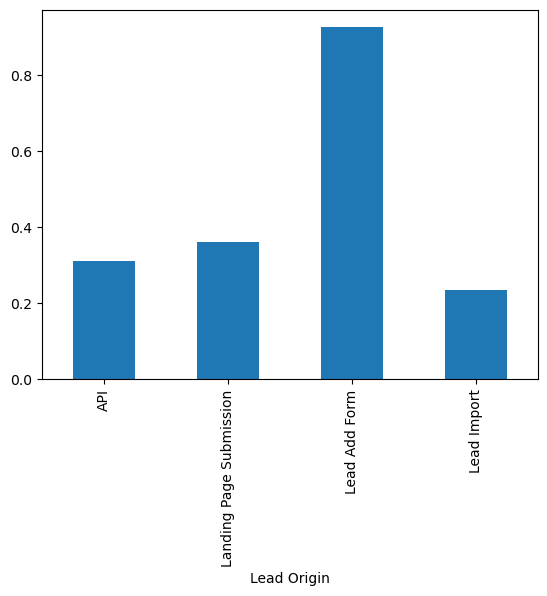

In [231]:
#Comparing Categorical Variable with target variable
df_init.groupby(['Lead Origin'])['Converted'].mean().plot.bar()
plt.show()

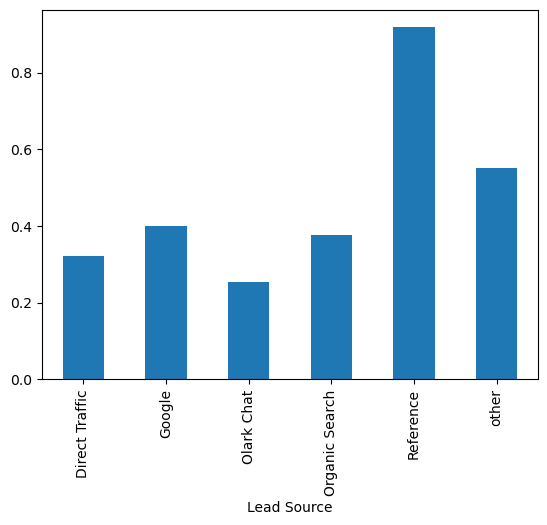

In [232]:
#Comparing Categorical Variable with target variable
df_init.groupby(['Lead Source'])['Converted'].mean().plot.bar()
plt.show()

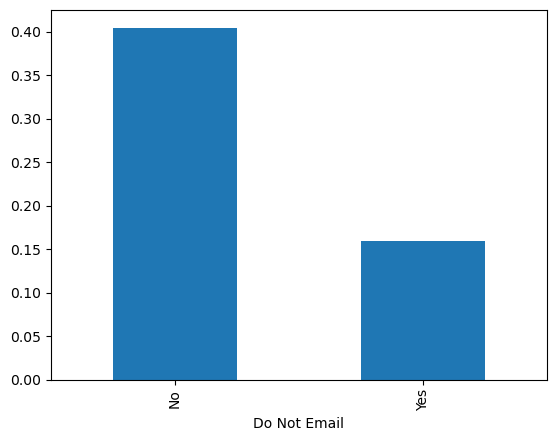

In [233]:
#Comparing Categorical Variable with target variable
df_init.groupby(['Do Not Email'])['Converted'].mean().plot.bar()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

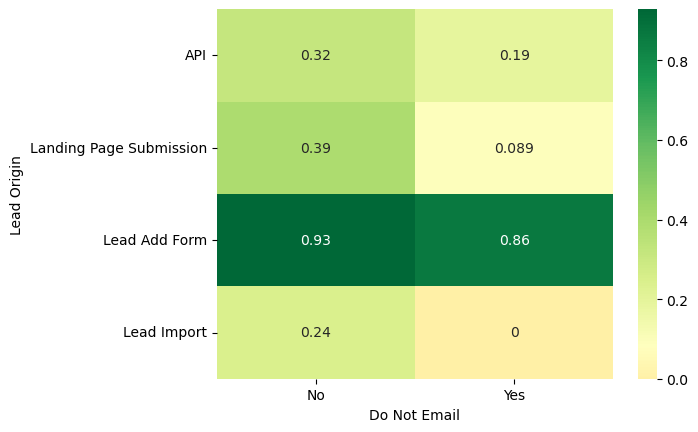

In [234]:
#MultiVariate Analysis
x=pd.pivot_table(data=df_init,index="Lead Origin",columns="Do Not Email",values="Converted")
sns.heatmap(x,annot=True,cmap="RdYlGn",center=.080)
plt.show

In [235]:
for i in cat:
    print(i,end="---")
    print('Missing',end=":")
    print(df_init[i].isnull().mean()*100)
    print(round(df_init[i].value_counts(normalize=True)*100,2))
    print()

Lead Origin---Missing:0.0
Landing Page Submission    52.88
API                        38.75
Lead Add Form               7.77
Lead Import                 0.60
Name: Lead Origin, dtype: float64

Lead Source---Missing:0.3788288775841541
Google            31.16
Direct Traffic    27.63
Olark Chat        19.07
Organic Search    12.54
Reference          5.80
other              3.80
Name: Lead Source, dtype: float64

Do Not Email---Missing:0.0
No     92.07
Yes     7.93
Name: Do Not Email, dtype: float64

Last Activity---Missing:0.0
Email Opened               38.32
SMS Sent                   29.71
other                      14.51
Olark Chat Conversation    10.53
Page Visited on Website     6.93
Name: Last Activity, dtype: float64

Country---Missing:0.0
India    96.89
other     3.11
Name: Country, dtype: float64

What is your current occupation---Missing:0.0
Unemployed              89.72
Working Professional     7.64
other                    2.64
Name: What is your current occupation, dtype: flo

# Data Preparation
Converting some binary variables (Yes/No) to 0/1


In [236]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview', 'Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_init[varlist] = df_init[varlist].apply(binary_map)

In [237]:
df_init.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,other,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,other,India,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,other,India,Unemployed,Will revert after reading the email,0,Modified


For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [238]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_init[['Lead Origin', 'Lead Source', 'Last Activity', 'Country','What is your current occupation','Tags','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df_init = pd.concat([df_init, dummy1], axis=1)

In [239]:
df_init.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_other,Country_other,What is your current occupation_Working Professional,What is your current occupation_other,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Interested in other courses,0,Modified,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Ringing,0,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,other,Will revert after reading the email,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,other,India,Unemployed,Ringing,0,Modified,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,other,India,Unemployed,Will revert after reading the email,0,Modified,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [240]:
df_init = df_init.drop(['Lead Origin','Lead Source','Last Activity','Country','What is your current occupation', 'Tags', 'Last Notable Activity'], 1)

In [241]:
df_init

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_other,Country_other,What is your current occupation_Working Professional,What is your current occupation_other,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,0,0,0.0,0,0.00,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,5.0,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1.0,305,1.00,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
4,0,1,2.0,1428,1.00,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,8.0,1845,2.67,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1
9236,0,0,2.0,238,2.00,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
9237,1,0,2.0,199,2.00,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
9238,0,1,3.0,499,3.00,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


# Train Test Split

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
# Putting feature variable to X
X = df_init.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_other,Country_other,What is your current occupation_Working Professional,What is your current occupation_other,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [244]:
# Putting response variable to y
y = df_init['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [245]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

# Feature Scaling


In [246]:
from sklearn.preprocessing import StandardScaler

In [247]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_other,Country_other,What is your current occupation_Working Professional,What is your current occupation_other,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
3242,0,2.469912,1.501291,0.134949,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
5316,1,0.660031,-0.750761,1.535366,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4040,0,2.469912,-0.136895,-0.464430,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
7701,0,-0.425897,1.815489,-0.705302,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
5656,0,1.022008,0.849286,-0.145135,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [248]:
# Checking for Conversion Rate
churn = (sum(df_init['Converted'])/len(df_init['Converted'].index))*100
churn
#we have 38% conversion rate

38.53230869141682

# Finding Correlations

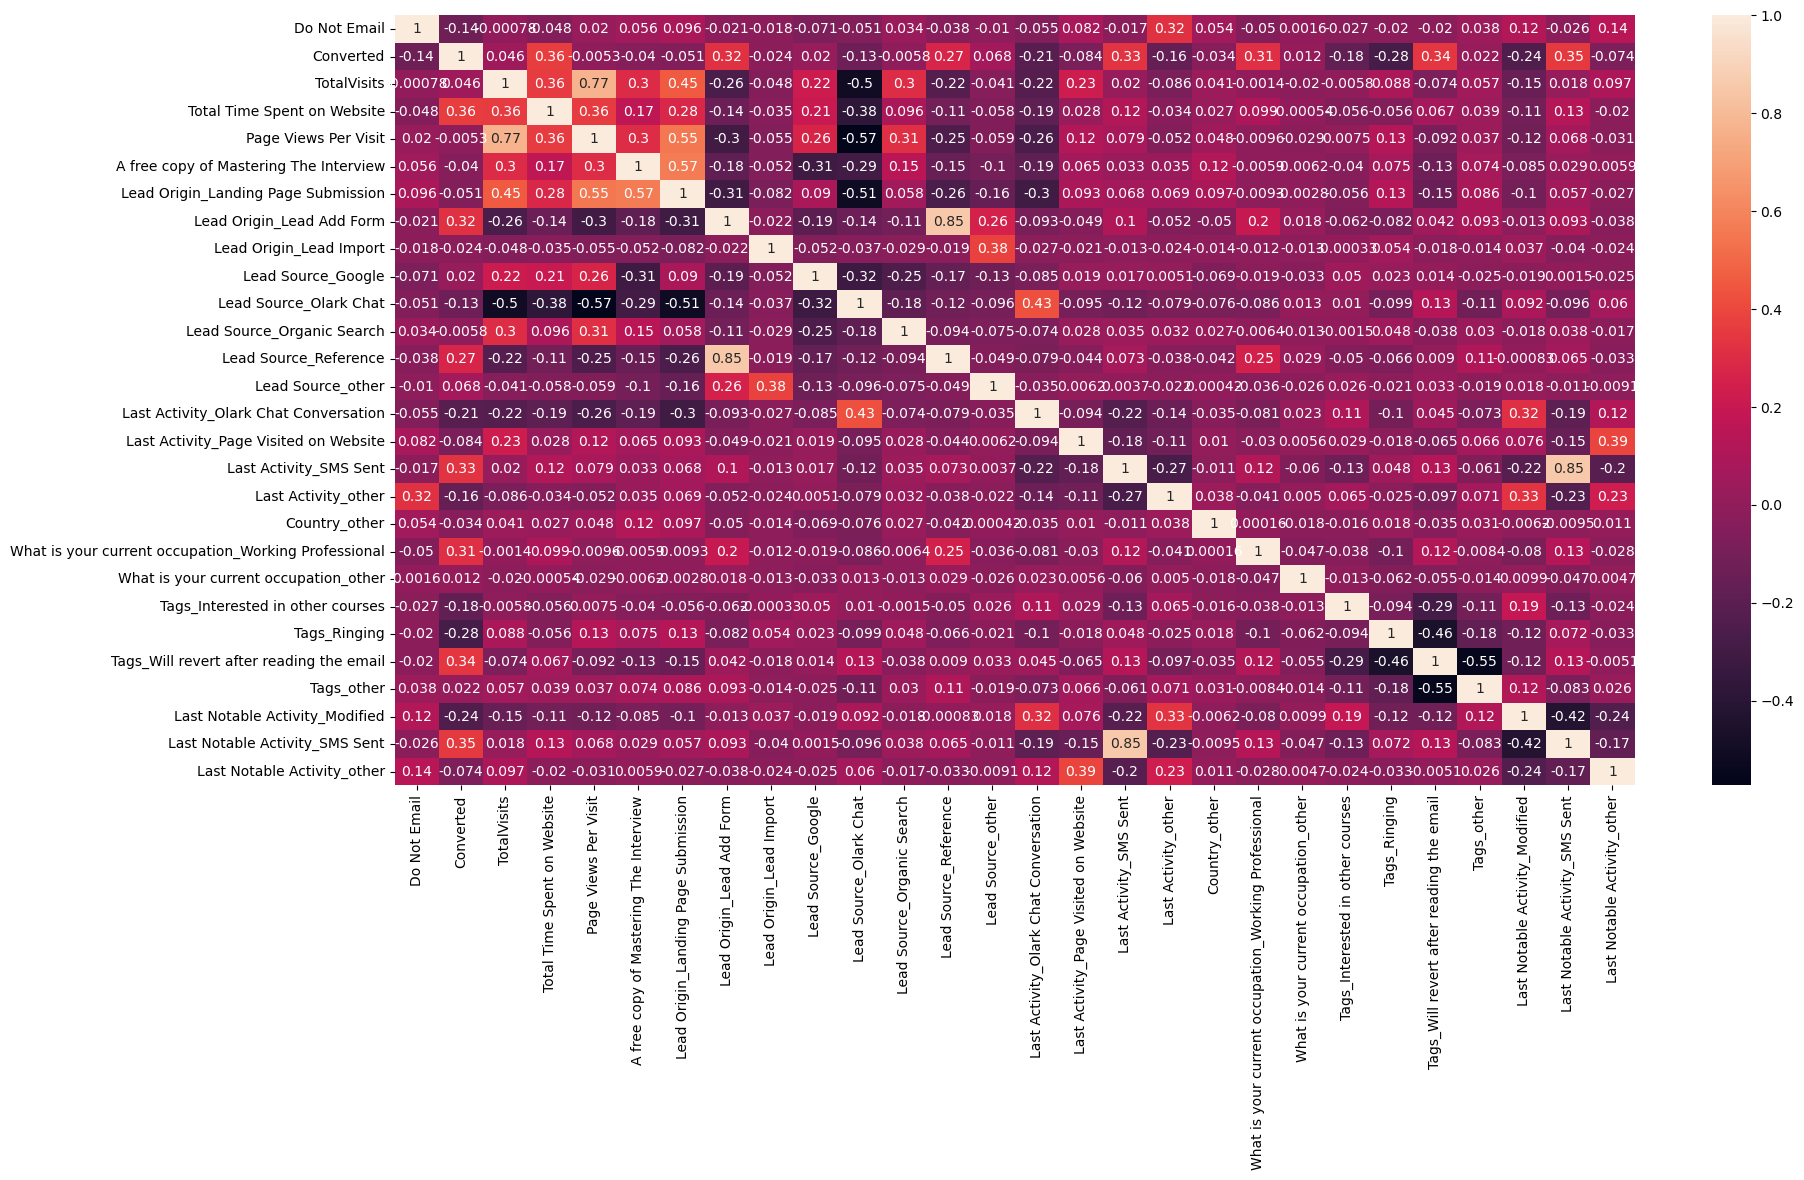

In [249]:
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_init.corr(),annot = True)
plt.show()

# Model Building

In [250]:
import statsmodels.api as sm

In [251]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6467
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2066.0
Date:                Sun, 05 Mar 2023   Deviance:                       4132.1
Time:                        15:45:00   Pearson chi2:                 9.92e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5024
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.5962      1.030     -6.405      0.000      -8.615      -4.578
Do Not Email                                            -1.5903      0.191     -8.346      0.000      -1.964      -1.217
TotalVisits                                              0.3554      0.064      5.517      0.000       0.229       0.482
Total Time Spent on Website                              1.2769      0.049     25.937      0.000       1.180       1.373
Page Views Per Visit                                    -0.2348      0.070     -3.372      0.001      -0.371      -0.098
A free copy of Mastering The Interview                   0.0971      0.121      0.801      0.423      -0.141       0.335
Lead Origin_Landing Page Submission                     -0.0065      0.124     -0.052      0.958      -0.250       0.237
Lead Origin_Lead Add Form                                4.9647      0.534      9.294      0.000       3.918       6.012
Lead Origin_Lead Import                                  0.7312      0.544      1.345      0.179      -0.334       1.797
Lead Source_Google                                       0.1765      0.130      1.355      0.175      -0.079       0.432
Lead Source_Olark Chat                                   1.2312      0.188      6.561      0.000       0.863       1.599
Lead Source_Organic Search                               0.0663      0.151      0.440      0.660      -0.229       0.361
Lead Source_Reference                                   -0.5967      0.577     -1.035      0.301      -1.727       0.534
Lead Source_other                                        0.3963      0.294      1.346      0.178      -0.181       0.973
Last Activity_Olark Chat Conversation                   -1.5108      0.215     -7.018      0.000      -1.933      -1.089
Last Activity_Page Visited on Website                   -0.8732      0.232     -3.764      0.000      -1.328      -0.418
Last Activity_SMS Sent                                   0.0608      0.198      0.306      0.759      -0.328       0.450
Last Activity_other                                     -0.6142      0.194     -3.170      0.002      -0.994      -0.234
Country_other                                           -0.3717      0.236     -1.573      0.116      -0.835       0.091
What is your current occupation_Working Professional     2.8986      0.241     12.042      0.000       2.427       3.370
What is your current occupation_other                    1.5652      0.303      5.161      0.000       0.971       2.160
Tags_Interested in other courses                         2.0783      1.086      1.914      0.056      -0.050       4.207
Tags_Ringing                                             1

# Feature Selection Using RFE

In [252]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [253]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [254]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
        True, False, False,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True])

In [255]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('A free copy of Mastering The Interview', False, 11),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_other', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', False, 7),
 ('Last Activity_other', True, 1),
 ('Country_other', False, 2),
 ('What is your current occupation_Working Professional', True, 1),
 ('What is your current occupation_other', True, 1),
 ('Tags_Interested in other courses', False, 13),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_other', True,

In [256]:
col = X_train.columns[rfe.support_]

In [257]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Last Activity_SMS Sent', 'Country_other',
       'Tags_Interested in other courses', 'Last Notable Activity_Modified'],
      dtype='object')

In [258]:
#Assesing Model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6467
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2090.4
Date:                Sun, 05 Mar 2023   Deviance:                       4180.7
Time:                        15:45:16   Pearson chi2:                 9.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4987
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.0064      0.350    -14.298      0.000      -5.693      -4.320
Do Not Email                                            -1.6275      0.187     -8.726      0.000      -1.993      -1.262
Total Time Spent on Website                              1.2861      0.049     26.350      0.000       1.190       1.382
Lead Origin_Lead Add Form                                4.2266      0.231     18.280      0.000       3.773       4.680
Lead Source_Olark Chat                                   0.9805      0.115      8.501      0.000       0.754       1.207
Lead Source_other                                        0.5645      0.226      2.499      0.012       0.122       1.007
Last Activity_Olark Chat Conversation                   -1.6666      0.172     -9.689      0.000      -2.004      -1.329
Last Activity_Page Visited on Website                   -0.9133      0.188     -4.867      0.000      -1.281      -0.546
Last Activity_other                                     -0.8705      0.142     -6.117      0.000      -1.149      -0.592
What is your current occupation_Working Professional     2.9086      0.240     12.105      0.000       2.438       3.379
What is your current occupation_other                    1.4555      0.288      5.052      0.000       0.891       2.020
Tags_Ringing                                            -0.2649      0.417     -0.635      0.525      -1.082       0.552
Tags_Will revert after reading the email                 4.3588      0.348     12.518      0.000       3.676       5.041
Tags_other                                               3.7701      0.354     10.640      0.000       3.076       4.465
Last Notable Activity_SMS Sent                           1.8330      0.104     17.633      0.000       1.629       2.037
Last Notable Activity_other                              0.6725      0.164      4.105      0.000       0.351       0.994
========================================================================================================================
"""

In [259]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3242    0.957557
5316    0.196597
4040    0.155220
7701    0.935101
5656    0.994438
5398    0.327190
4500    0.306845
403     0.030553
2237    0.272852
8026    0.077163
dtype: float64

In [260]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.95755678, 0.19659712, 0.15521952, 0.93510083, 0.99443794,
       0.32718964, 0.30684508, 0.03055282, 0.27285185, 0.07716307])

In [261]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.957557,3242
1,0,0.196597,5316
2,0,0.155220,4040
3,0,0.935101,7701
4,1,0.994438,5656


In [262]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.957557,3242,1
1,0,0.196597,5316,0
2,0,0.155220,4040,0
3,0,0.935101,7701,1
4,1,0.994438,5656,1


In [263]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3598  351]
 [ 483 2035]]


In [264]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8710375753827122


In [265]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [266]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,2.13
3,Lead Source_Olark Chat,1.83
13,Last Notable Activity_SMS Sent,1.56
7,Last Activity_other,1.55
14,Last Notable Activity_other,1.51
5,Last Activity_Olark Chat Conversation,1.45
6,Last Activity_Page Visited on Website,1.42
2,Lead Origin_Lead Add Form,1.35
1,Total Time Spent on Website,1.31
12,Tags_other,1.27


In [267]:
col = col.drop('Last Notable Activity_SMS Sent', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_other', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_other',
       'What is your current occupation_Working Professional',
       'What is your current occupation_other', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_other',
       'Last Notable Activity_other'],
      dtype='object')

In [268]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6467
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2267.2
Date:                Sun, 05 Mar 2023   Deviance:                       4534.4
Time:                        15:45:47   Pearson chi2:                 9.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4705
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.7218      0.345    -13.669      0.000      -5.399      -4.045
Do Not Email                                            -1.2705      0.180     -7.073      0.000      -1.623      -0.918
Total Time Spent on Website                              1.2788      0.047     27.249      0.000       1.187       1.371
Lead Origin_Lead Add Form                                4.2096      0.230     18.278      0.000       3.758       4.661
Lead Source_Olark Chat                                   0.9603      0.108      8.855      0.000       0.748       1.173
Lead Source_other                                        0.3504      0.217      1.617      0.106      -0.074       0.775
Last Activity_Olark Chat Conversation                   -2.1945      0.168    -13.041      0.000      -2.524      -1.865
Last Activity_Page Visited on Website                   -1.4687      0.184     -7.967      0.000      -1.830      -1.107
Last Activity_other                                     -1.4628      0.138    -10.568      0.000      -1.734      -1.192
What is your current occupation_Working Professional     2.9338      0.231     12.722      0.000       2.482       3.386
What is your current occupation_other                    1.3122      0.283      4.643      0.000       0.758       1.866
Tags_Ringing                                             0.4925      0.407      1.210      0.226      -0.305       1.291
Tags_Will revert after reading the email                 4.6250      0.345     13.404      0.000       3.949       5.301
Tags_other                                               4.0295      0.351     11.467      0.000       3.341       4.718
Last Notable Activity_other                              0.6547      0.163      4.019      0.000       0.335       0.974
========================================================================================================================
"""

In [269]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['Converted_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.860927,3242,1
1,0,0.088873,5316,0
2,0,0.149983,4040,0
3,0,0.960270,7701,1
4,1,0.980603,5656,1


In [270]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8490799443327663


In [271]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.83
11,Tags_Will revert after reading the email,1.73
13,Last Notable Activity_other,1.51
7,Last Activity_other,1.47
5,Last Activity_Olark Chat Conversation,1.41
6,Last Activity_Page Visited on Website,1.39
2,Lead Origin_Lead Add Form,1.34
1,Total Time Spent on Website,1.30
0,Do Not Email,1.25
12,Tags_other,1.22


In [272]:
#Drop Tags_Ringing as P value is high
col = col.drop('Tags_Ringing', 1)
col


Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_other', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_other',
       'What is your current occupation_Working Professional',
       'What is your current occupation_other',
       'Tags_Will revert after reading the email', 'Tags_other',
       'Last Notable Activity_other'],
      dtype='object')

In [273]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6467
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2268.0
Date:                Sun, 05 Mar 2023   Deviance:                       4535.9
Time:                        15:46:02   Pearson chi2:                 9.21e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4703
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.3972      0.196    -22.459      0.000      -4.781      -4.013
Do Not Email                                            -1.2691      0.180     -7.064      0.000      -1.621      -0.917
Total Time Spent on Website                              1.2784      0.047     27.254      0.000       1.186       1.370
Lead Origin_Lead Add Form                                4.2262      0.232     18.235      0.000       3.772       4.680
Lead Source_Olark Chat                                   0.9581      0.108      8.841      0.000       0.746       1.170
Lead Source_other                                        0.3445      0.217      1.589      0.112      -0.080       0.769
Last Activity_Olark Chat Conversation                   -2.1973      0.168    -13.071      0.000      -2.527      -1.868
Last Activity_Page Visited on Website                   -1.4706      0.184     -7.985      0.000      -1.832      -1.110
Last Activity_other                                     -1.4646      0.138    -10.593      0.000      -1.736      -1.194
What is your current occupation_Working Professional     2.9169      0.228     12.766      0.000       2.469       3.365
What is your current occupation_other                    1.2638      0.275      4.597      0.000       0.725       1.803
Tags_Will revert after reading the email                 4.3024      0.197     21.815      0.000       3.916       4.689
Tags_other                                               3.7069      0.208     17.804      0.000       3.299       4.115
Last Notable Activity_other                              0.6534      0.163      4.015      0.000       0.334       0.972
========================================================================================================================
"""

In [274]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['Converted_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.861098,3242,1
1,0,0.089179,5316,0
2,0,0.150030,4040,0
3,0,0.960234,7701,1
4,1,0.980310,5656,1


In [275]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8487706819236122


In [276]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.82
10,Tags_Will revert after reading the email,1.71
12,Last Notable Activity_other,1.51
7,Last Activity_other,1.45
5,Last Activity_Olark Chat Conversation,1.41
6,Last Activity_Page Visited on Website,1.38
2,Lead Origin_Lead Add Form,1.34
1,Total Time Spent on Website,1.30
0,Do Not Email,1.25
11,Tags_other,1.21


In [277]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3642,  307],
       [ 671, 1847]], dtype=int64)

# Other Metrices

In [278]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [279]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7335186656076251

In [280]:
# Let us calculate specificity
TN / float(TN+FP)

0.9222587996961256

In [281]:
# Calculate false postive rate - predicting Converted when customer does not convert
print(FP/ float(TN+FP))

0.0777412003038744


In [282]:
# positive predictive value 
print (TP / float(TP+FP))

0.8574744661095636


In [283]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8444238349176907


# ROC Curve

In [284]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [285]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

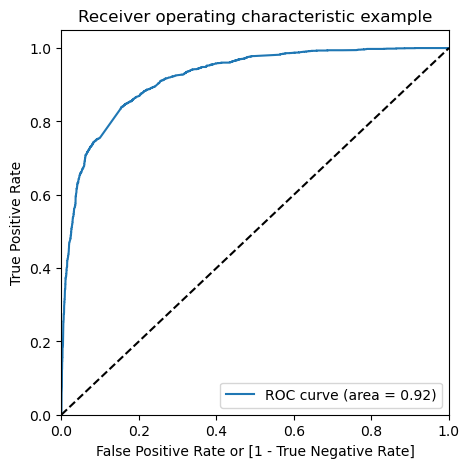

In [286]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Finding optimal cutoff

In [287]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.861098,3242,1,1,1,1,1,1,1,1,1,1,0
1,0,0.089179,5316,0,1,0,0,0,0,0,0,0,0,0
2,0,0.150030,4040,0,1,1,0,0,0,0,0,0,0,0
3,0,0.960234,7701,1,1,1,1,1,1,1,1,1,1,1
4,1,0.980310,5656,1,1,1,1,1,1,1,1,1,1,1


In [288]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389361  1.000000  0.000000
0.1   0.1  0.704500  0.969817  0.535325
0.2   0.2  0.760786  0.945195  0.643201
0.3   0.3  0.813979  0.893566  0.763231
0.4   0.4  0.839184  0.847895  0.833629
0.5   0.5  0.848771  0.733519  0.922259
0.6   0.6  0.842585  0.688642  0.940744
0.7   0.7  0.831297  0.635028  0.956445
0.8   0.8  0.799598  0.530977  0.970879
0.9   0.9  0.747178  0.367355  0.989364


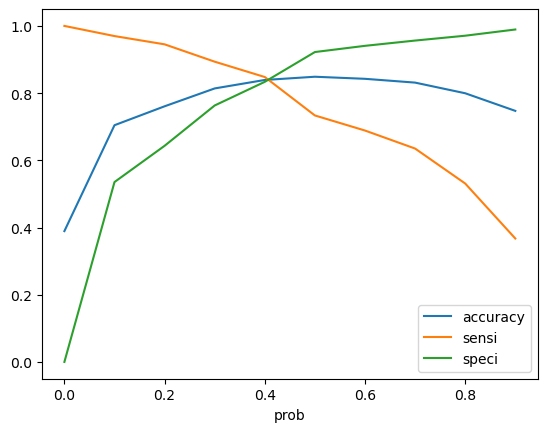

In [289]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# .4 seems perfect cutoff

In [290]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.861098,3242,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.089179,5316,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.150030,4040,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.960234,7701,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.980310,5656,1,1,1,1,1,1,1,1,1,1,1,1


In [291]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8139786608937684

In [292]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3014,  935],
       [ 268, 2250]], dtype=int64)

In [293]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8935663224781573

In [294]:
# Let us calculate specificity
TN / float(TN+FP)

0.7632311977715878

In [295]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23676880222841226


In [296]:
# Positive predictive value 
print (TP / float(TP+FP))

0.706436420722135


In [297]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9183424741011579


# Precision and Recall

In [298]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion 

array([[3642,  307],
       [ 671, 1847]], dtype=int64)

In [299]:
#precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8574744661095636

In [300]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7335186656076251

In [301]:
from sklearn.metrics import precision_score, recall_score

In [302]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8574744661095636

In [303]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7335186656076251

In [304]:
#tradeoff
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6462    0
 6463    0
 6464    1
 6465    0
 6466    0
 Name: Converted, Length: 6467, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       1
        ..
 6462    0
 6463    1
 6464    1
 6465    0
 6466    0
 Name: predicted, Length: 6467, dtype: int64)

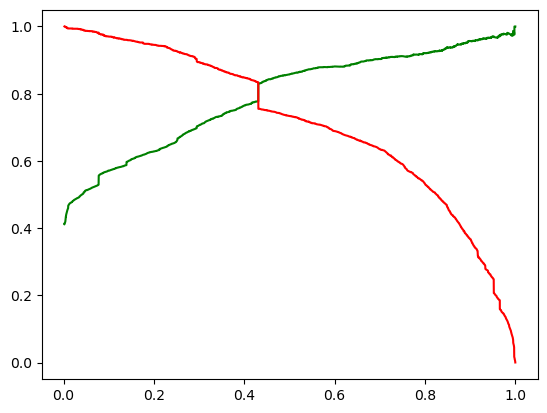

In [305]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Prediction On Test Set

In [306]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_other,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_other,What is your current occupation_Working Professional,What is your current occupation_other,Tags_Will revert after reading the email,Tags_other,Last Notable Activity_other
2018,0,1.504923,0,0,0,0,0,1,1,0,1,0,0
6746,0,-0.623629,0,0,0,1,0,0,0,0,1,0,0
2032,0,-0.659953,0,0,0,0,0,0,0,0,1,0,0
529,0,0.945543,0,0,0,0,0,1,0,0,0,1,0
3642,0,1.786430,0,0,0,0,0,0,0,0,1,0,0


In [307]:
X_test_sm = sm.add_constant(X_test)

In [308]:
y_test_pred = res.predict(X_test_sm)

In [309]:
y_test_pred[:10]

2018    0.963785
6746    0.043550
2032    0.281205
529     0.279669
3642    0.899254
2771    0.004639
8954    0.009570
1361    0.004682
7736    0.990579
8281    0.578739
dtype: float64

In [310]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [311]:
# Let's see the head
y_pred_1.head()

,0
2018,0.963785
6746,0.043550
2032,0.281205
529,0.279669
3642,0.899254


In [312]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [313]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [314]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [315]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [316]:
y_pred_final.head()

,Converted,CustID,0
0,1,2018,0.963785
1,0,6746,0.043550
2,1,2032,0.281205
3,1,529,0.279669
4,1,3642,0.899254


In [317]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})


In [318]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_Prob'], axis=1)

In [319]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,2018,1,0.963785
1,6746,0,0.043550
2,2032,1,0.281205
3,529,1,0.279669
4,3642,1,0.899254


In [320]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [321]:
y_pred_final['Converted_Prob'] = y_pred_final['Converted_Prob']*100

In [322]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,2018,1,96.378500,1
1,6746,0,4.354985,0
2,2032,1,28.120505,0
3,529,1,27.966912,0
4,3642,1,89.925413,1


In [323]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.829004329004329

In [324]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1440,  290],
       [ 184,  858]], dtype=int64)

In [325]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [326]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8234165067178503

In [327]:
# Let us calculate specificity
TN / float(TN+FP)

0.8323699421965318